# Effect of presence of aluminium substrate

In [2]:
import funcs

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

deg = np.pi/180. # conversion factor degrees to radians

In [3]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
nkDir     = workDir+'nk/'
datapath  = 'data/'

In [4]:
# initialize wavelength scale and refractive indeces
wav = {'1A':np.linspace(4.8,5.8,10000),'1B':np.linspace(5.6,6.7,10000)}
n_ZnS,n_Si,n_SiAs,n_Al = [{} for i in range(4)]
for band in wav.keys():
    n_ZnS[band]  = funcs.indexOfRefractionZnS(wav[band])
    n_Si[band]   = funcs.indexOfRefractionSi(wav[band])
    n_SiAs[band] = funcs.indexOfRefractionSiAs(wav[band])
    n_Al[band] = funcs.indexOfRefractionAl(wav[band])

### Test case: ZnS layer on Si layer on Si:As layer on Al substrate

<IPython.core.display.Javascript object>


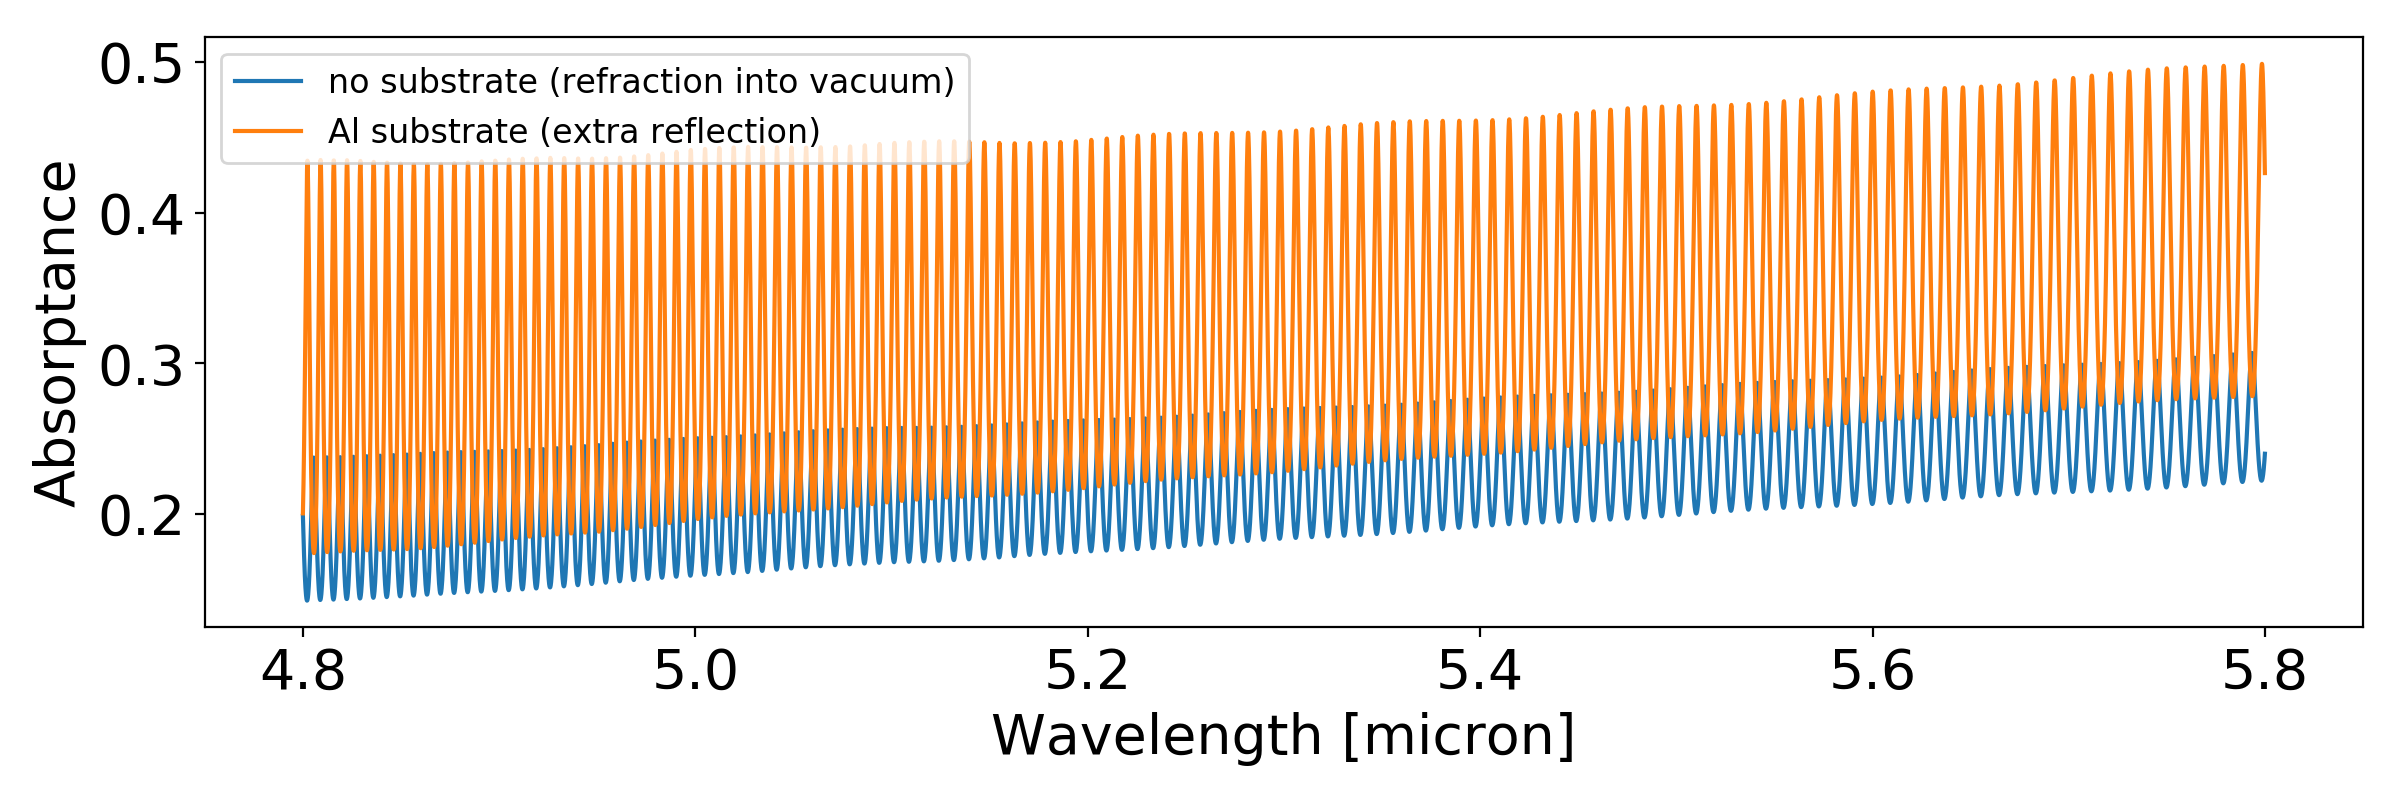

In [21]:
band = '1A'
Refl_woSubstrate,Transm_woSubstrate,Absorp_woSubstrate = [np.zeros(len(wav[band])) for i in range(3)]
Refl_wSubstrate,Transm_wSubstrate,Absorp_wSubstrate = [np.zeros(len(wav[band])) for i in range(3)]
for i,wvl in enumerate(wav[band]):
    # define stack of refractive layers
    n_list_woSubstrate = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], 1] # refractive index
    n_list_wSubstrate = [1,n_ZnS[band][i],n_Si[band][i],n_SiAs[band][i], n_Al[band][i]] # refractive index
    d_list = [np.inf, 0.65e3,465e3,35e3, np.inf] # thickness, nanometers
    lambda_vac = wvl*1000 # convert microns to nanometers
    # solve the Fresnel equations using the Transfer-Matrix Method
    Refl_woSubstrate[i],Transm_woSubstrate[i],Absorp_woSubstrate[i] =  funcs.simple_tmm(n_list_woSubstrate, d_list, 0*deg, lambda_vac)
    Refl_wSubstrate[i],Transm_wSubstrate[i],Absorp_wSubstrate[i] =  funcs.simple_tmm(n_list_wSubstrate, d_list, 0*deg, lambda_vac)

plt.figure(figsize=(12,4))
plt.plot(wav[band],Absorp_woSubstrate,label='no substrate (refraction into vacuum)')
plt.plot(wav[band],Absorp_wSubstrate,label='Al substrate (extra reflection)')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Absorptance')
plt.legend(loc='upper left',fontsize=12)
plt.tight_layout()

### Remarks:
* The presence of an aluminium substrate increases the fringe contrast substantially.
* The fringe phase is affected by the reflection on the aluminium substrate. It looks like the difference is pi/2(?) That would make sense given that the electric field of an EM wave changes phase by pi/2 when reflecting off a surface.

Is the phase difference between the two cases exactly pi/2 though? Let's check this.

<IPython.core.display.Javascript object>


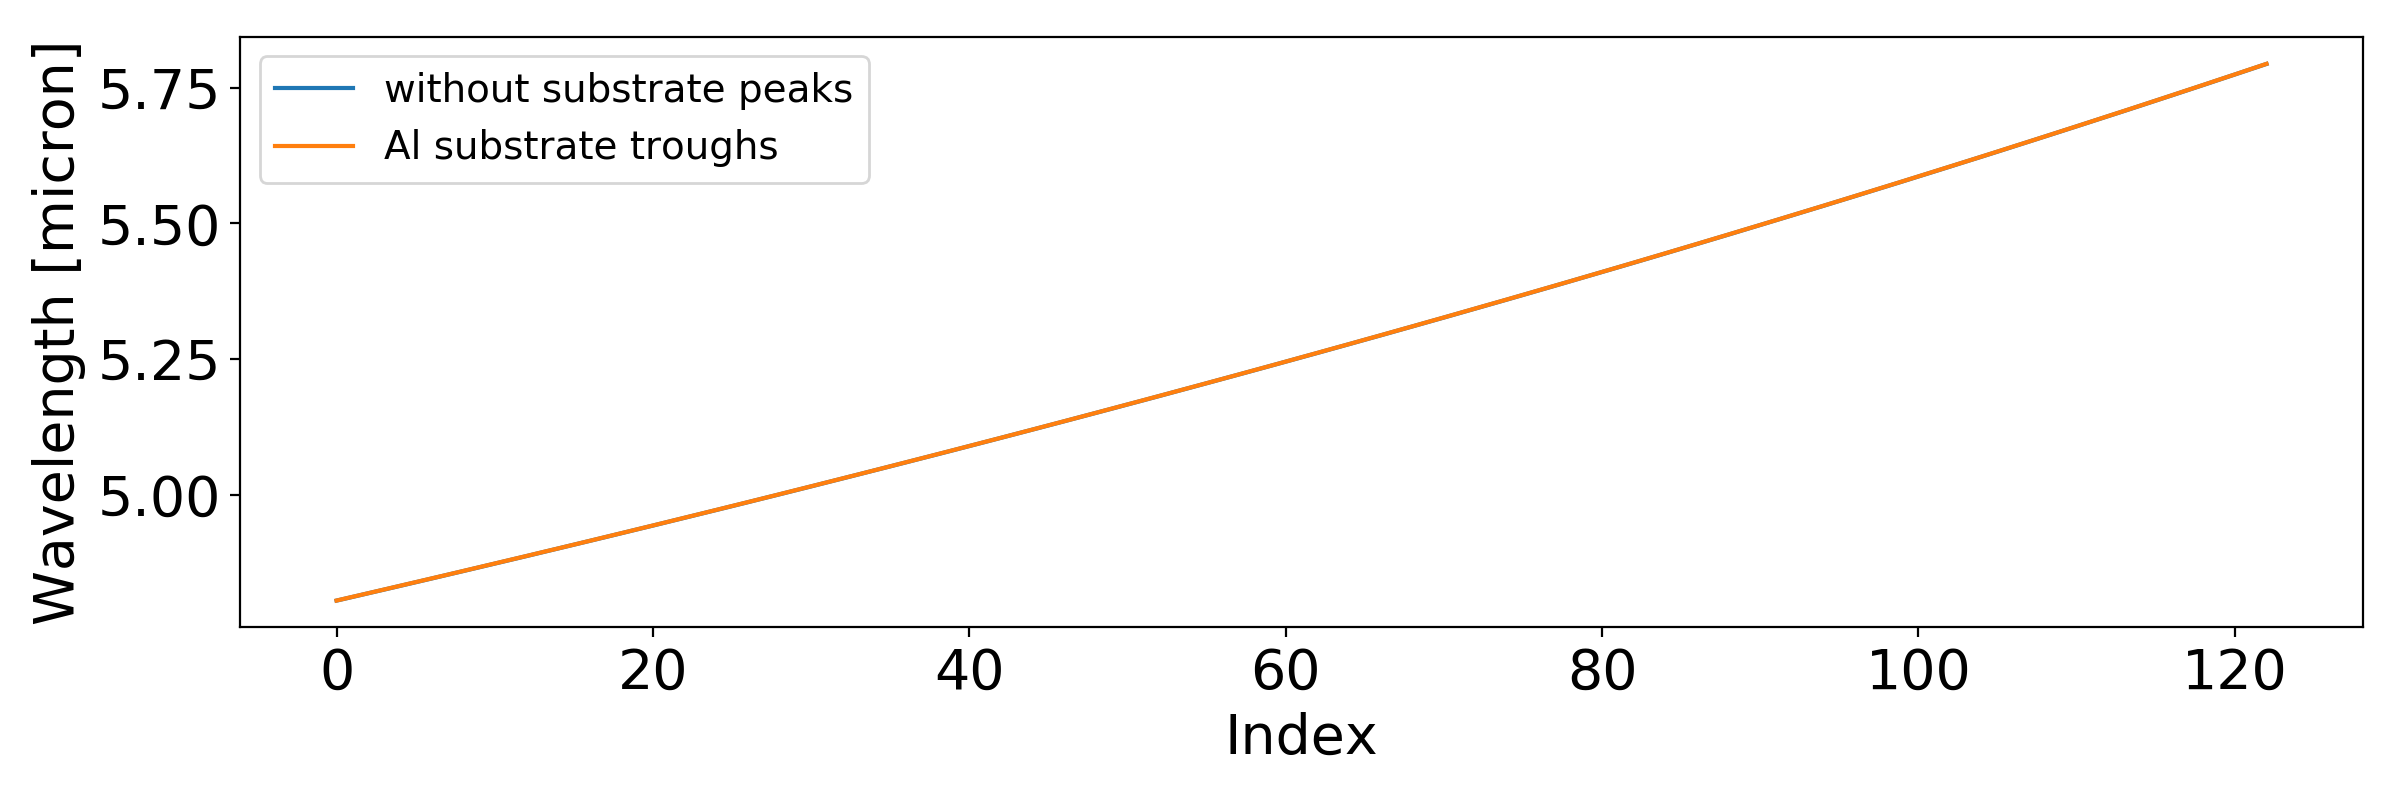

<IPython.core.display.Javascript object>


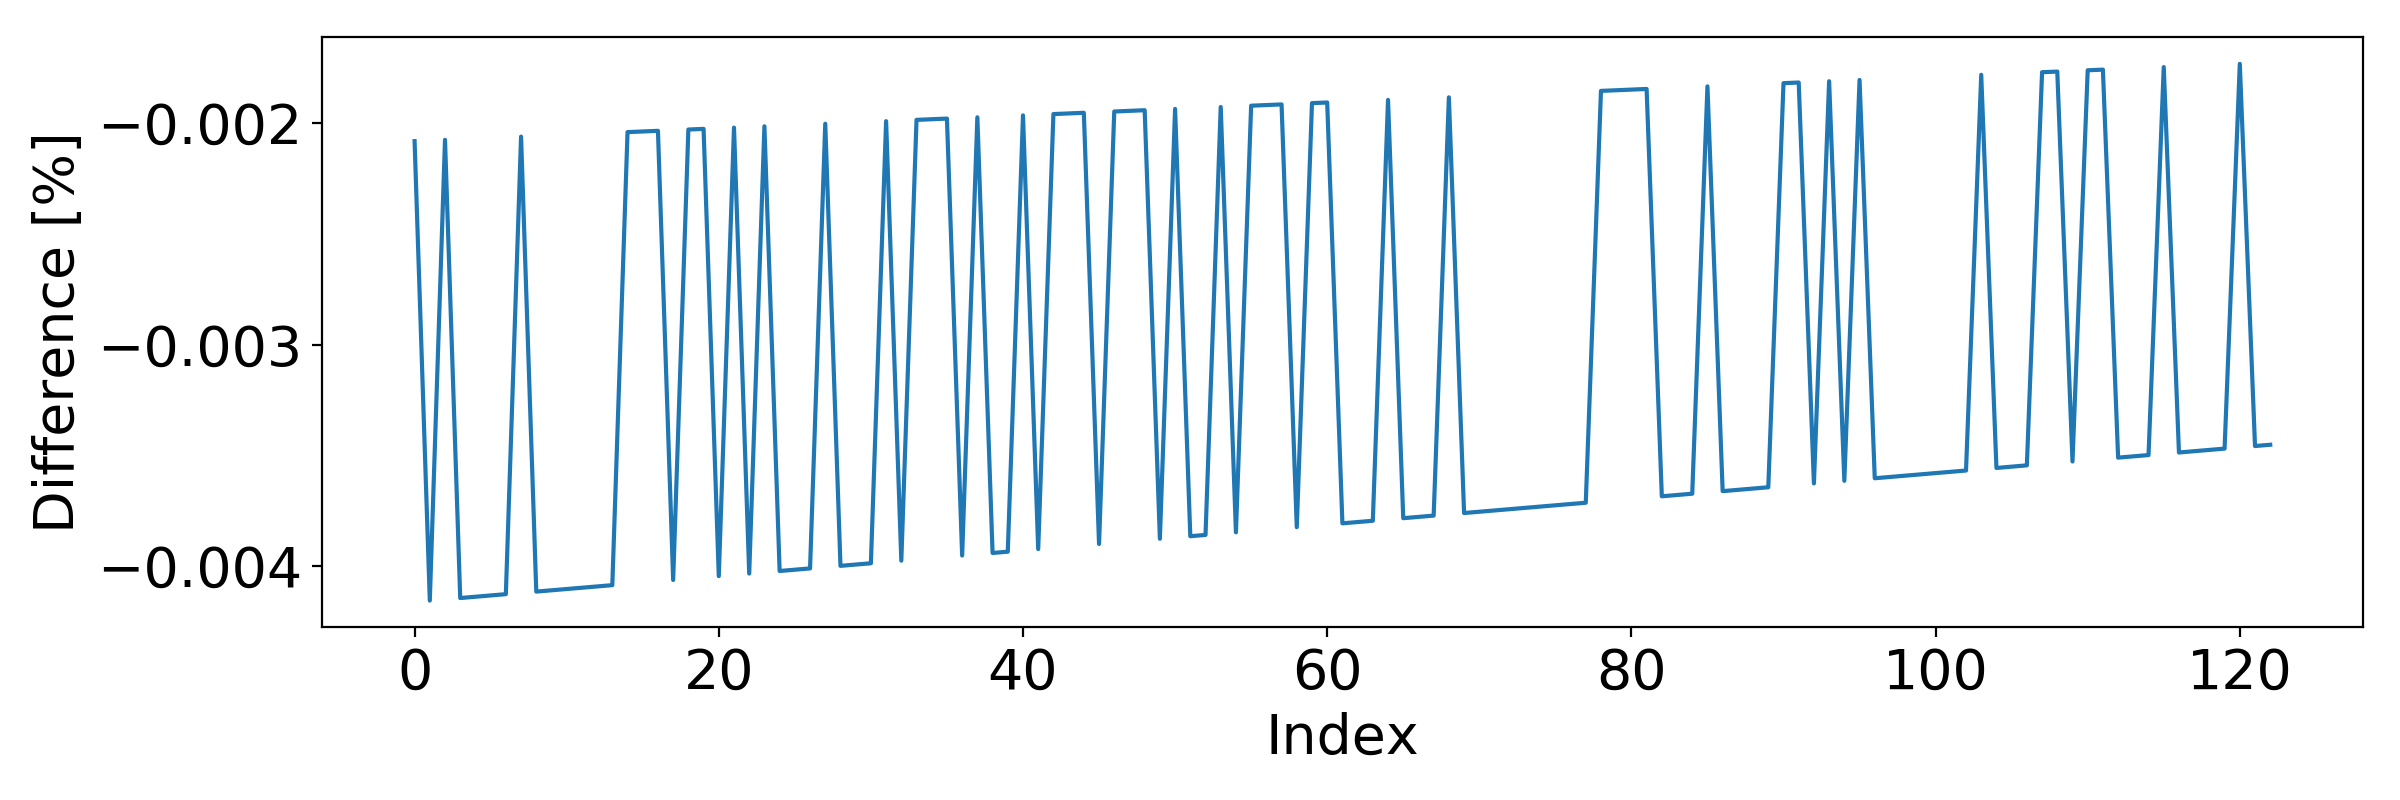

In [35]:
Absorp_woSubstrate_norm = funcs.norm_fringe(Absorp_woSubstrate,thres=0,min_dist=50,k=3,ext=0)
Absorp_wSubstrate_norm = funcs.norm_fringe(-Absorp_wSubstrate,thres=0,min_dist=50,k=3,ext=0)

plt.figure(figsize=(12,4))
plt.plot(wav[band][Absorp_woSubstrate_norm[1]],label='without substrate peaks')
plt.plot(wav[band][Absorp_wSubstrate_norm[1]],label='Al substrate troughs')
plt.xlabel('Index')
plt.ylabel('Wavelength [micron]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(((wav[band][Absorp_woSubstrate_norm[1]]-wav[band][Absorp_wSubstrate_norm[1]])/wav[band][Absorp_wSubstrate_norm[1]])*100. )
plt.xlabel('Index')
plt.ylabel('Difference [%]')
plt.legend(loc='upper left')
plt.tight_layout()

### Remarks:
* For all intents and purposes, we find that the phase difference between the peaks of the "no substrate" case and the troughs of the "Al substrate" case overlap, hence the phase difference between the two curves is exactly pi/2 as expected.